### Buidling an Image Classifier Using Sequential API

In [ ]:
import tensorflow as tf

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [3]:
X_train.shape

(55000, 28, 28)

In [4]:
X_train.dtype

dtype('uint8')

For simplicity, we’ll scale the pixel intensities down to the 0–1 range by dividing them by 255.0 (this also converts them to floats):

In [5]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

With MNIST, when the label is equal to 5, it means that the image represents the handwritten digit 5. Easy. For Fashion MNIST, however, we need the list of class names to know what we are dealing with:

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                   "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [7]:
class_names[y_train[0]]

'Ankle boot'

#### Creating the model using the sequential API

Now let’s build the neural network! Here is a classification MLP with two hidden layers:

In [8]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28,28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

Instead of adding the layers one by one as we just did, it’s often more convenient to pass a list of layers when creating the Sequential model. You can also drop the Input layer and instead specify the input_shape in the first layer:

In [9]:
model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=[28, 28]),
        tf.keras.layers.Dense(300, activation="relu"),
        tf.keras.layers.Dense(100, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax")
])

The model’s summary() method displays all the model’s layers,14 including each layer’s name (which is automatically generated unless you set it when creating the layer), its output shape (None means the batch size can be anything), and its number of parameters. The summary ends with the total number of parameters, including trainable and non-trainable parameters. Here we only have trainable parameters (you will see some non-trainable parameters later in this chapter):

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Note that Dense layers often have a lot of parameters. For example, the first hidden layer has 784 × 300 connection weights, plus 300 bias terms, which adds up to 235,500 parameters! This gives the model quite a lot of flexibility to fit the training data, but it also means that the model runs the risk of overfitting, especially when you do not have a lot of training data. We will come back to this later.

Each layer in a model must have a unique name (e.g., "dense_2"). You can set the layer names explicitly using the constructor’s name argument, but generally it’s sim‐ pler to let Keras name the layers automatically, as we just did. Keras takes the layer’s class name and converts it to snake case (e.g., a layer from the MyCoolLayer class is named "my_cool_layer" by default). Keras also ensures that the name is globally unique, even across models, by appending an index if needed, as in "dense_2". But why does it bother making the names unique across models? Well, this makes it possible to merge models easily without getting name conflicts.

You can easily get a model’s list of layers using the layers attribute, or use the get_layer() method to access a layer by name:

In [11]:
model.layers

In [12]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [13]:
model.get_layer('dense_3') is hidden1

True

All the parameters of a layer can be accessed using its get_weights() and set_weights() methods. For a Dense layer, this includes both the connection weights and the bias terms:

In [14]:
weights, biases = hidden1.get_weights()
weights

array([[-0.02942029, -0.05104617,  0.01888413, ..., -0.00963584,
         0.00509793, -0.01332125],
       [ 0.00837117,  0.07015467, -0.02402548, ..., -0.03381578,
        -0.00456972,  0.02198619],
       [ 0.05980836,  0.02347302,  0.06064194, ...,  0.02525298,
        -0.05568516, -0.03913609],
       ...,
       [-0.02283396,  0.06496638, -0.06129782, ..., -0.05192918,
        -0.01233678,  0.07293658],
       [-0.0434502 ,  0.05569619,  0.00712063, ...,  0.06597055,
         0.03276262,  0.04785875],
       [ 0.04570358,  0.04756051, -0.04021416, ...,  0.06205037,
         0.03478755, -0.04127552]], dtype=float32)

In [15]:
weights.shape

(784, 300)

In [16]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [17]:
biases.shape

(300,)

#### Compiling the model

After a model is created, you must call its compile() method to specify the loss function and the optimizer to use. Optionally, you can specify a list of extra metrics to compute during training and evaluation:

In [18]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

Using loss="sparse_categorical_crossentropy" is the equivalent of using loss=tf.keras.losses.sparse_categorical_ crossentropy. Similarly, using optimizer="sgd" is the equiva‐ lent of using optimizer=tf.keras.optimizers.SGD(), and using metrics=["accuracy"] is the equivalent of using metrics= [tf.keras.metrics.sparse_categorical_accuracy] (when using this loss). We will use many other losses, optimizers, and metrics in this book; for the full lists, see https://keras.io/api/losses, https:// keras.io/api/optimizers, and https://keras.io/api/metrics.

This code requires explanation. We use the "sparse_categorical_crossentropy" loss because we have sparse labels (i.e., for each instance, there is just a target class index, from 0 to 9 in this case), and the classes are exclusive. If instead we had one target probability per class for each instance (such as one-hot vectors, e.g., [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.] to represent class 3), then we would need to use the "categorical_crossentropy" loss instead. If we were doing binary classification or multilabel binary classification, then we would use the "sigmoid" activation function in the output layer instead of the "softmax" activation function, and we would use the "binary_crossentropy" loss.

If you want to convert sparse labels (i.e., class indices) to one-hot vector labels, use the tf.keras.utils.to_categorical() func‐ tion. To go the other way round, use the np.argmax() function with axis=1.


Regarding the optimizer, "sgd" means that we will train the model using stochastic gradient descent. In other words, Keras will perform the backpropagation algorithm described earlier (i.e., reverse-mode autodiff plus gradient descent).


When using the SGD optimizer, it is important to tune the learn‐ ing rate. So, you will generally want to use optimizer=tf.keras. optimizers.SGD(learning_rate=__???__) to set the learning rate, rather than optimizer="sgd", which defaults to a learning rate of 0.01.

Finally, since this is a classifier, it’s useful to measure its accuracy during training and evaluation, which is why we set metrics=["accuracy"].

#### Training and evaluating the model

In [19]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7161 - accuracy: 0.7637 - val_loss: 0.5029 - val_accuracy: 0.8332
Epoch 2/30
1719/1719 [==============================] - 2s 982us/step - loss: 0.4847 - accuracy: 0.8311 - val_loss: 0.4624 - val_accuracy: 0.8338
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4391 - accuracy: 0.8461 - val_loss: 0.4217 - val_accuracy: 0.8546
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4140 - accuracy: 0.8540 - val_loss: 0.3959 - val_accuracy: 0.8622
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3940 - accuracy: 0.8605 - val_loss: 0.3909 - val_accuracy: 0.8636
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3782 - accuracy: 0.8653 - val_loss: 0.3975 - val_accuracy: 0.8636
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3660 - accuracy: 0.8692 - val_loss: 0.3718 - val_accurac

We pass it the input features (X_train) and the target classes (y_train), as well as the number of epochs to train (or else it would default to just 1, which would definitely not be enough to converge to a good solution). We also pass a validation set (this is optional). Keras will measure the loss and the extra metrics on this set at the end of each epoch, which is very useful to see how well the model really performs. If the performance on the training set is much better than on the validation set, your model is probably overfitting the training set, or there is a bug, such as a data mismatch between the training set and the validation set.

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

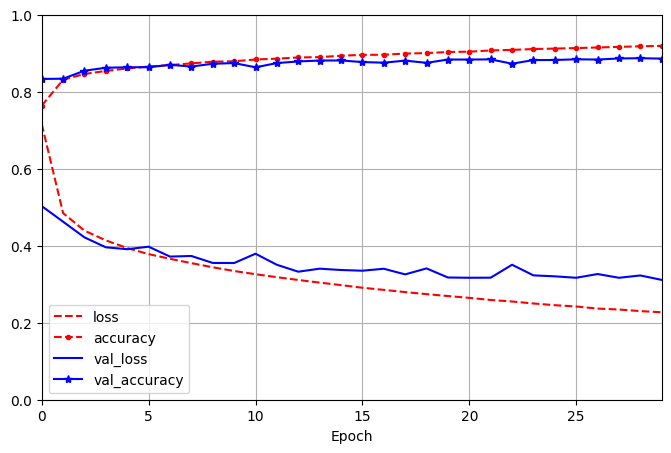

In [22]:
pd.DataFrame(history.history).plot(
    figsize=(8,5), xlim=[0,29], ylim=[0,1], grid=True, xlabel='Epoch',
    style=['r--', 'r--.', 'b-', 'b-*']
)
plt.show()

In [23]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 870us/step - loss: 0.3287 - accuracy: 0.8846


[0.32868897914886475, 0.8845999836921692]

#### Using the model to make predictions

In [24]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 78ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.97],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

For each instance the model estimates one probability per class, from class 0 to class 9. This is similar to the output of the predict_proba() method in Scikit-Learn classifiers. For example, for the first image it estimates that the probability of class 9 (ankle boot) is 96%, the probability of class 7 (sneaker) is 2%, the probability of class 5 (sandal) is 1%, and the probabilities of the other classes are negligible. In other words, it is highly confident that the first image is footwear, most likely ankle boots but possibly sneakers or sandals. If you only care about the class with the highest estimated probability (even if that probability is quite low), then you can use the argmax() method to get the highest probability class index for each instance:

In [25]:
import numpy as np
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1])

In [26]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [27]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

### Building a Regression MLP Using Sequential API

Let’s switch back to the California housing problem and tackle it using the same MLP as earlier, with 3 hidden layers composed of 50 neurons each, but this time building it with Keras.

Using the sequential API to build, train, evaluate, and use a regression MLP is quite similar to what we did for classification. The main differences in the following code example are the fact that the output layer has a single neuron (since we only want to predict a single value) and it uses no activation function, the loss function is the mean squared error, the metric is the RMSE, and we’re using an Adam optimizer like Scikit-Learn’s MLPRegressor did. Moreover, in this example we don’t need a Flatten layer, and instead we’re using a Normalization layer as the first layer: it does the same thing as Scikit-Learn’s StandardScaler, but it must be fitted to the training data using its adapt() method before you call the model’s fit() method. Let’s take a look:

In [31]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='mse', optimizer=optimizer, metrics=['RootMeanSquaredError'])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
1719/1719 [==============================] - 4s 2ms/step - loss: 8.6769 - root_mean_squared_error: 2.9457 - val_loss: 8.4374 - val_root_mean_squared_error: 2.9049
Epoch 2/20
1719/1719 [==============================] - 3s 2ms/step - loss: 8.3093 - root_mean_squared_error: 2.8826 - val_loss: 8.3972 - val_root_mean_squared_error: 2.8980
Epoch 3/20
1719/1719 [==============================] - 3s 2ms/step - loss: 8.2884 - root_mean_squared_error: 2.8790 - val_loss: 8.4128 - val_root_mean_squared_error: 2.9006
Epoch 4/20
1719/1719 [==============================] - 3s 2ms/step - loss: 8.2814 - root_mean_squared_error: 2.8777 - val_loss: 8.4527 - val_root_mean_squared_error: 2.9074
Epoch 5/20
1719/1719 [==============================] - 3s 2ms/step - loss: 8.2742 - root_mean_squared_error: 2.8765 - val_loss: 8.3916 - val_root_mean_squared_error: 2.8970
Epoch 6/20
1719/1719 [==============================] - 3s 2ms/step - loss: 8.2648 - root_mean_squared_error: 2.8749 - val_loss: 8

The Normalization layer learns the feature means and standard deviations in the training data when you call the adapt() method. Yet when you display the model’s summary, these statistics are listed as non-trainable. This is because these parameters are not affected by gradient descent.

As you can see, the sequential API is quite clean and straightforward. However, although Sequential models are extremely common, it is sometimes useful to build neural networks with more complex topologies, or with multiple inputs or outputs. For this purpose, Keras offers the functional API.

### Building Complex Models Using the Functional API

One example of a nonsequential neural network is a Wide & Deep neural network. This neural network architecture was introduced in a 2016 paper by Heng-Tze Cheng et al. It connects all or part of the inputs directly to the output layer. This architecture makes it possible for the neural network to learn both deep patterns (using the deep path) and simple rules (through the short path). In contrast, a regular MLP forces all the data to flow through the full stack of layers; thus, simple patterns in the data may end up being distorted by this sequence of transformations.

Let’s build such a neural network to tackle the California housing problem:

In [32]:
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

Once you have built this Keras model, everything is exactly like earlier, so there’s no need to repeat it here: you compile the model, adapt the Normalization layer, fit the model, evaluate it, and use it to make predictions.

But what if you want to send a subset of the features through the wide path and a different subset (possibly overlapping) through the deep path. In this case, one solution is to use multiple inputs. For example, suppose we want to send five features through the wide path (features 0 to 4), and six features through the deep path (features 2 to 7). We can do this as follows:

In [35]:
input_wide = tf.keras.layers.Input(shape=[5]) # features 0 to 4 
input_deep = tf.keras.layers.Input(shape=[6]) # features 2 to 7 
norm_layer_wide = tf.keras.layers.Normalization() 
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])